In [10]:
import pandas as pd
import numpy as np
import seaborn
import itertools
import matplotlib.pyplot as plt
from pathlib import Path

seaborn.set_context("paper")
seaborn.set_theme()
%matplotlib inline

In [11]:
def read_csv(fname):
    print(fname)
    df = pd.read_csv(fname) 
    s = str(fname).split("/")
    compiler, model, arch, routine = s[2].split(".")[0:4]
    df['model'] = model
    df['arch'] = arch
    df['compiler'] = compiler
    df['routine'] = routine
    return df

In [12]:
df = pd.concat(read_csv(f) for f in Path(".").glob("../*/*.csv"))

../openmp/nvidia.openmp.v100.atomic.csv
../openmp/cray.openmp.mi100.array.csv
../openmp/cray.openmp.mi100.manual.csv
../openmp/nvidia.openmp.v100.manual.csv
../openmp/nvidia.openmp.skylake.atomic.csv
../openmp/nvidia.openmp.v100.array.csv
../openmp/nvidia.openmp.skylake.manual.csv
../openmp/nvidia.openmp.skylake.array.csv
../openmp/nvidia.openmp.a100.array.csv
../openmp/nvidia.openmp.a100.manual.csv
../openmp/nvidia.openmp.a100.atomic.csv
../openmp/cray.openmp.mi100.atomic.csv
../openmp-loop/nvidia.openmp-loop.a100.manual.csv
../openmp-loop/nvidia.openmp-loop.skylake.atomic.csv
../openmp-loop/cray.openmp-loop.mi100.array.csv
../openmp-loop/nvidia.openmp-loop.v100.atomic.csv
../openmp-loop/nvidia.openmp-loop.a100.atomic.csv
../openmp-loop/nvidia.openmp-loop.skylake.manual.csv
../openmp-loop/nvidia.openmp-loop.v100.manual.csv
../openmp-loop/cray.openmp-loop.mi100.atomic.csv
../openmp-loop/cray.openmp-loop.mi100.manual.csv
../openacc/nvidia.openacc.v100.manual.csv
../openacc/nvidia.openac

In [13]:
df.head()

iteration  n  m      time   model  arch compiler routine
0          1  4  2  0.000650  openmp  v100   nvidia  atomic
1          2  4  2  0.000014  openmp  v100   nvidia  atomic
2          3  4  2  0.000012  openmp  v100   nvidia  atomic
3          4  4  2  0.000011  openmp  v100   nvidia  atomic
4          5  4  2  0.000011  openmp  v100   nvidia  atomic

In [14]:
df['gflops'] = 1e-9 * (2 * df['m'] * df['n']**2)/ df['time']

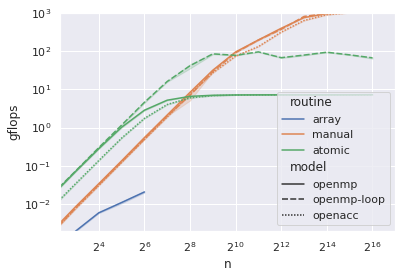

In [15]:
m = (df['arch']=='a100') & (df['m'] == 8)
ax = seaborn.lineplot(data=df[m], x='n', y='gflops', style='model', hue='routine')
ax.set(yscale='log')
ax.set_xscale('log', base=2)
ax.set_xlim(5, 1<<17)
ax.set_ylim(2e-3, 1e3)
plt.savefig("array-reduction-a100-m8.pdf")

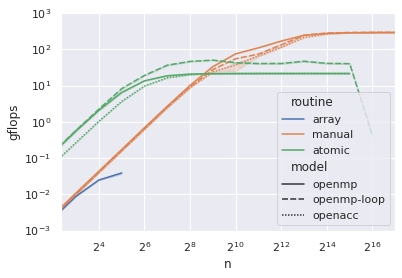

In [16]:
m = (df['arch']=='a100') & (df['m'] == 64)
ax = seaborn.lineplot(data=df[m], x='n', y='gflops', style='model', hue='routine')
ax.set(yscale='log')
ax.set_xscale('log', base=2)
ax.set_xlim(5, 1<<17)
ax.set_ylim(1e-3, 1e3)
plt.savefig("array-reduction-a100-m64.pdf")

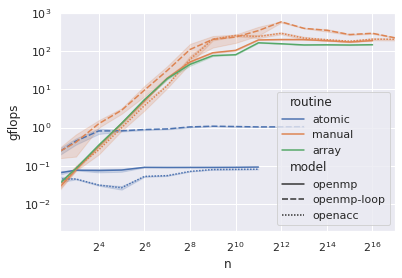

In [17]:
m = (df['arch']=='skylake') & (df['m'] == 64)
ax = seaborn.lineplot(data=df[m], x='n', y='gflops', style='model', hue='routine')
ax.set(yscale='log')
ax.set_xscale('log', base=2)
ax.set_xlim(5, 1<<17)
ax.set_ylim(2e-3, 1e3)
plt.savefig("array-reduction-skylake-m64.pdf")

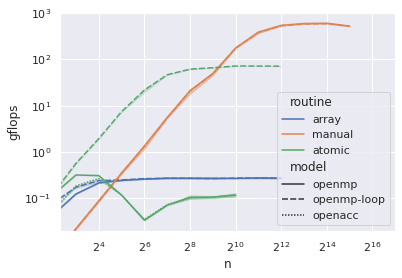

In [18]:
m = (df['arch']=='mi100') & (df['m'] == 64) & (df['gflops'] < 1000) #& (df['n'] <= 2**12)
ax = seaborn.lineplot(data=df[m], x='n', y='gflops', style='model', hue='routine')
ax.set(yscale='log')
ax.set_xscale('log', base=2)
ax.set_xlim(5, 1<<17)
ax.set_ylim(2e-2, 1e3)
plt.savefig("array-reduction-mi100-m64.pdf")